--- 
layout: post 
title: "Same Old Song and Dance" 
date: 2018-04-16 8:30:00 
categories: applications data-mining scraping 
image: /images/rainy_bridge.jpg
---


In [ ]:
https://towardsdatascience.com/beyond-the-lyrics-the-intersection-of-music-and-data-visualization-4a71039f447c

In [3]:
!pip install spotipy

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scipy as sp
import json
import os
import math


import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

matplotlib.style.use('ggplot')

import time
import datetime



In [ ]:
https://developer.spotify.com/web-api/get-audio-features/
    

## Spotify API

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


json_data=open('{0}/spotify_credentials.json'.format(os.getenv("HOME"))).read()
credentials = json.loads(json_data)

client_credentials_manager = SpotifyClientCredentials(client_id=credentials['ClientId'], 
                                                      client_secret=credentials['ClientSecret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


https://github.com/plamere/spotipy

### Search for an Artist

In [4]:
name="The Clash"
clash = sp.search(q='artist:' + name, type='artist')['artists']['items'][0]

print(json.dumps(clash, indent=1))


Image(url=clash['images'][0]['url'])


{
 "genres": [
  "classic rock", 
  "dance rock", 
  "permanent wave", 
  "punk", 
  "rock"
 ], 
 "name": "The Clash", 
 "external_urls": {
  "spotify": "https://open.spotify.com/artist/3RGLhK1IP9jnYFH4BRFJBS"
 }, 
 "popularity": 75, 
 "uri": "spotify:artist:3RGLhK1IP9jnYFH4BRFJBS", 
 "href": "https://api.spotify.com/v1/artists/3RGLhK1IP9jnYFH4BRFJBS", 
 "followers": {
  "total": 1692646, 
  "href": null
 }, 
 "images": [
  {
   "url": "https://i.scdn.co/image/ab470b275daa38351810a1eb91d107ebdb821302", 
   "width": 1000, 
   "height": 676
  }, 
  {
   "url": "https://i.scdn.co/image/9061b7dad3306249408403d72a410a62c26e794c", 
   "width": 640, 
   "height": 433
  }, 
  {
   "url": "https://i.scdn.co/image/4befb6b7cf4c3d6b7fda1f71b717203d90adf897", 
   "width": 200, 
   "height": 135
  }, 
  {
   "url": "https://i.scdn.co/image/7575ab17620ee9b273885bd35980a020cf4d38f9", 
   "width": 64, 
   "height": 43
  }
 ], 
 "type": "artist", 
 "id": "3RGLhK1IP9jnYFH4BRFJBS"
}


### Search for Albums

In [8]:
track.keys()

[u'album',
 u'is_local',
 u'name',
 u'uri',
 u'external_urls',
 u'popularity',
 u'explicit',
 u'preview_url',
 u'is_playable',
 u'track_number',
 u'disc_number',
 u'href',
 u'artists',
 u'duration_ms',
 u'external_ids',
 u'type',
 u'id']

In [7]:
name="the clash"
nwa_uri = sp.search(q='artist:' + name, type='artist')['artists']['items'][0]['uri']

results = sp.artist_top_tracks(nwa_uri)

for track in results['tracks'][:10]:
    print 'track    : ' + track['name']
    print 'audio    : ' + track['preview_url']
    print 'explicit : {}'.format(track['explicit'])
    print 'duration : {}'.format(track['duration_ms'])
    print 'cover art: ' + track['album']['images'][0]['url']
    print

track    : Should I Stay or Should I Go - Remastered
audio    : https://p.scdn.co/mp3-preview/670a419f7cb549ef6d3d7f9c5060ac6b8c112fa4?cid=b48b0725f835441faee1d4915fef0b96
explicit : False
duration : 188986
cover art: https://i.scdn.co/image/ab67616d0000b27325a4df452a3c42ccc2e9288b

track    : London Calling - Remastered
audio    : https://p.scdn.co/mp3-preview/cab17680a55cff3339dec569c52b079efda6daad?cid=b48b0725f835441faee1d4915fef0b96
explicit : False
duration : 200480
cover art: https://i.scdn.co/image/ab67616d0000b273cd9d8bc9ef04014b6e90e182

track    : Rock the Casbah - Remastered
audio    : https://p.scdn.co/mp3-preview/8db94be7e0aa2112512883e7fd6f3e7bcf09123c?cid=b48b0725f835441faee1d4915fef0b96
explicit : False
duration : 222426
cover art: https://i.scdn.co/image/ab67616d0000b27325a4df452a3c42ccc2e9288b

track    : Train in Vain - Remastered
audio    : https://p.scdn.co/mp3-preview/06b9fadab4dd93988aeb5816fe972bf70777ecca?cid=b48b0725f835441faee1d4915fef0b96
explicit : False
d

In [69]:
uri = sp.search(q='artist:' + artist, type='artist')['artists']['items'][0]['uri']
results = sp.artist_albums(uri, album_type='album')
results['items'][0].keys()

dict_keys(['album_group', 'album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'type', 'uri'])

### Search for Tracks

In [9]:

results = sp.search(q='Skatalities', limit=20)
for i, t in enumerate(results['tracks']['items']):
    print ' ', i, t['name']


  0 Exodus
  1 Dr. Ring Ding
  2 Summertime - Clash of the Ska Titans
  3 Freedom Sounds (Live) [Guns of Navarone]
  4 Simmer Down (Live) [Guns of Navarone]
  5 Come Down (Live) [Guns of Navarone]
  6 Sugar Sugar (Live) [Clash of the Ska Titans]
  7 Confucious (Live) [Clash of the Ska Titans]
  8 Come Down (Live) [Clash of the Ska Titans]
  9 Can't You See (Live) [Guns of Navarone]
  10 Come Down - Clash of the Ska Titans
  11 Confucious (Live) [Guns of Navarone]
  12 It's Too Late - Clash of the Ska Titans
  13 Bad Minded Woman - Clash of the Ska Titans
  14 Eastern Standard Time (Live) [Guns of Navarone]
  15 Bridge View (Live) [Guns of Navarone]
  16 Rude Boy Dreams - Clash of the Ska Titans
  17 Don't Go Away (Live) [Guns of Navarone]
  18 I Love You - Clash of the Ska Titans
  19 Same Old Song - Clash of the Ska Titans


In [10]:
def get_discography(artist):
    uri = sp.search(q='artist:' + artist, type='artist')['artists']['items'][0]['uri']
    results = sp.artist_albums(uri, album_type='album')
    albums = results['items']
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    return dict([(album['name'], 
                  {'ds': album['release_date'], 
                               'tracks': get_tracks(album)})
                 for album in albums if 'US' in album['available_markets']])

def get_tracks(album):
    tracks = []
    results = sp.album_tracks(album['id'])
    tracks.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return [track['name'] for track in tracks]



### Dead or Alive?

In [11]:
# is old and toast distinguishable from dead?

dead = ['NWA', 'Clash', 'Fabrizio de andre', 'Leonard Cohen', 
        'The Doors', 'David Bowie', '2Pac', 'Queen']

alive = ['Run the Jewels', 'Heems', 'Swet shop boys', 'Gucci Mane', 
         'The Black Angels', 'Dengue Fever', 'Die Antwoord']

old = ['Metallica', 'Rolling Stones', 'AC/DC', 'Skatalities', 'Specials', 
       'Bob Dylan', 'Bruce Springsteen', 'Elton John']

In [12]:
clash_disco = get_discography('the clash')

In [13]:
print('\n'.join(clash_disco.keys()))

Live At Shea Stadium
Live at Shea Stadium (Remastered)
The Clash (Remastered)
Combat Rock (Remastered)
Cut The Crap
Give 'Em Enough Rope (Remastered)
London Calling (Remastered)
From Here to Eternity (Live) [Remastered]
Sandinista! (Remastered)
London Calling (Legacy Edition)


In [68]:
clash_disco['London Calling (Legacy Edition)']

{'ds': '1979',
 'tracks': ['London Calling',
  'Brand New Cadillac',
  'Jimmy Jazz',
  'Hateful',
  "Rudie Can't Fail",
  'Spanish Bombs',
  'The Right Profile',
  'Lost in the Supermarket',
  'Clampdown',
  'The Guns of Brixton',
  "Wrong 'Em Boyo",
  'Death or Glory',
  'Koka Kola',
  'The Card Cheat',
  "Lover's Rock",
  'Four Horsemen',
  "I'm Not Down",
  'Revolution Rock',
  'Train in Vain',
  'Hateful',
  "Rudie Can't Fail",
  "Paul's Tune",
  "I'm Not Down",
  'Four Horsemen',
  'Koka Kola, Advertising & Cocaine',
  'Death or Glory',
  "Lover's Rock",
  'Lonesome Me',
  'The Police Walked in 4 Jazz',
  'Lost in the Supermarket',
  'Up-Toon - Instrumental',
  'Walking the Slidewalk',
  'Where You Gonna Go (Soweto)',
  'The Man In Me',
  'Remote Control',
  'Working and Waiting',
  'Heart and Mind',
  'Brand New Cadillac',
  'London Calling',
  'Revolution Rock']}

In [61]:
clash_disco['London Calling']

{'ds': '1979',
 'tracks': ['London Calling - Remastered',
  'Brand New Cadillac',
  'Jimmy Jazz',
  'Hateful',
  "Rudie Can't Fail",
  'Spanish Bombs',
  'The Right Profile',
  'Lost in the Supermarket',
  'Clampdown',
  'The Guns of Brixton',
  "Wrong 'Em Boyo",
  'Death or Glory',
  'Koka Kola',
  'The Card Cheat',
  "Lover's Rock",
  'Four Horsemen',
  "I'm Not Down",
  'Revolution Rock',
  'Train in Vain - Remastered']}

In [15]:
metallica_disco = get_discography('Metallica')

In [16]:
print('\n'.join(metallica_disco.keys()))

Master of Puppets (Remastered Deluxe Box Set)
Metallica Through The Never (Music from the Motion Picture)
Hardwired…To Self-Destruct (Deluxe)
Kill 'Em All (Remastered)
Helping Hands...Live & Acoustic at The Masonic
Master of Puppets (Remastered)
Live S**t: Binge & Purge
Metallica
Reload
Hardwired…To Self-Destruct
S&M
Ride The Lightning (Deluxe Remaster)
Some Kind Of Monster (Live)
Load
Garage, Inc.
...And Justice for All (Remastered Deluxe Box Set)
Lulu
St. Anger
Death Magnetic
Ride The Lightning (Remastered)
Kill 'Em All (Deluxe Remaster)
...And Justice for All (Remastered)


In [63]:
#def new_stuff(album1, album2):
    


def compare_songs(song1, song2):
    return song1 in song2
    

In [ ]:
class Song(object):
    
    def __init__(self, title, release_date, album):
        self.title, self.attributes = self._clean_and_enrich(title)
        self.album = album
        self.release_date = release_date
        
    
    def _clean_and_enrich(title):
        title = lower(title)
        attributes = []
        if 'remastered' in title or 'remaster' in title:
            attributes.append('remastered')
        if 'live' in title:
            attributes.append('live')
        
        
        return title, attributes

In [17]:

metallica_disco.keys()

[u'Master of Puppets (Remastered Deluxe Box Set)',
 u'Metallica Through The Never (Music from the Motion Picture)',
 u'Hardwired\u2026To Self-Destruct (Deluxe)',
 u"Kill 'Em All (Remastered)",
 u'Helping Hands...Live & Acoustic at The Masonic',
 u'Master of Puppets (Remastered)',
 u'Live S**t: Binge & Purge',
 u'Metallica',
 u'Reload',
 u'Hardwired\u2026To Self-Destruct',
 u'S&M',
 u'Ride The Lightning (Deluxe Remaster)',
 u'Some Kind Of Monster (Live)',
 u'Load',
 u'Garage, Inc.',
 u'...And Justice for All (Remastered Deluxe Box Set)',
 u'Lulu',
 u'St. Anger',
 u'Death Magnetic',
 u'Ride The Lightning (Remastered)',
 u"Kill 'Em All (Deluxe Remaster)",
 u'...And Justice for All (Remastered)']

In [64]:
metallica_disco['Master of Puppets (Remastered)']

{'ds': '1986-03-03',
 'tracks': ['Battery (Remastered)',
  'Master Of Puppets (Remastered)',
  'The Thing That Should Not Be (Remastered)',
  'Welcome Home (Sanitarium) (Remastered)',
  'Disposable Heroes (Remastered)',
  'Leper Messiah (Remastered)',
  'Orion (Remastered)',
  'Damage, Inc. (Remastered)']}

In [65]:
metallica_disco['Master of Puppets (Remastered Deluxe Box Set)']

{'ds': '1986-03-03',
 'tracks': ['Battery (Remastered)',
  'Master of Puppets (Remastered)',
  'The Thing That Should Not Be (Remastered)',
  'Welcome Home (Sanitarium) (Remastered)',
  'Disposable Heroes (Remastered)',
  'Leper Messiah (Remastered)',
  'Orion (Remastered)',
  'Damage, Inc. (Remastered)',
  'Battery (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'Master of Puppets (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'For Whom The Bell Tolls (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'Welcome Home (Sanitarium) (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'The Thing That Should Not Be (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  '(Anesthesia) - Pulling Teeth (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'Damage, Inc. (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'Fade to Black (Live at the Aragon Ballroom, Chicago, IL - May 25th, 1986)',
  'Seek & De

- over time how much of an album is original.
- barplot from 100% down to 0%
- Use title of the album too..
- minimal overlap should be fine since usually they don't overlap (beware of corner cases with artsy bands)
- how many versions of the old stuff


In [71]:
import Levenshtein as edit

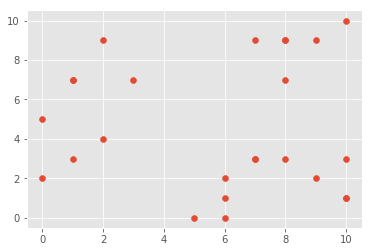

In [91]:
plt.scatter(*zip(*[(8, 3), (9, 2), (5, 0), (2, 9), (3, 7), (0, 5),
     (7, 3), (10, 1), (9, 9), (6, 2), (1, 7), (10, 1),
     (6, 0), (2, 4), (7, 3), (10, 3), (7, 9), (0, 2),
     (1, 3), (8, 7), (8, 9), (6, 1), (1, 7), (10, 10),
     (8, 9)]))

In [79]:
edit.jaro('Guitar Solo (Fan Recording - Live at Solnahallen, Stockholm, Sweden - September 26th, 1986)',
  'Am I Evil? (Fan Recording - Live at Solnahallen, Stockholm, Sweden - September 26th, 1986)')

0.806215827902575

In [80]:
edit.jaro('Orion (Late 1985 Guitar Solo Outtakes)',
  'Orion (Late 1985, Kirk & Lars in the Control Room)')

0.7474136955291456